In [4]:
# Load the dataset (make sure the file is in your notebook's directory)
df = pd.read_excel('Player.xlsx')  # Update the filename if needed
df.head()


,nombre,VALUE,VALUE_R,AGE,TEAM,EUROPA,MATCHES,GOALS,ASSISTS,MPG,MINUTES,INSTA
0,Mathys Tel,40.0,5,19,Bayern,1,88,25,6,113,2814,0.662
1,Victor Boniface,40.0,5,23,Bayer 04 Leverkusen,1,151,61,30,138,8445,0.727
2,Santiago Gimenez,40.0,5,23,Feyenoord,1,1,2,1,35,69,1.600
3,Bryan Mbeumo,40.0,5,24,Brentford FC,1,247,64,46,280,17945,0.120
4,Ademola Lookman,40.0,5,26,Atalanta,1,278,67,36,238,15932,0.741


In [6]:
from sklearn.preprocessing import LabelEncoder

# Strip and standardize column names
df.columns = df.columns.str.strip().str.upper()

# Check for nulls
print(df.isnull().sum())

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)
df.dropna(inplace=True)

# Encode categorical variables
df['EUROPA'] = df['EUROPA'].apply(lambda x: 1 if str(x).lower() == 'yes' else 0)

le = LabelEncoder()
df['TEAM_ENC'] = le.fit_transform(df['TEAM'])

# Drop non-useful columns
df.drop(columns=['NOMBRE', 'TEAM'], inplace=True)

df.head()


NOMBRE     0
VALUE      0
VALUE_R    0
AGE        0
TEAM       0
EUROPA     0
MATCHES    0
GOALS      0
ASSISTS    0
MPG        0
MINUTES    0
INSTA      0
dtype: int64


,VALUE,VALUE_R,AGE,EUROPA,MATCHES,GOALS,ASSISTS,MPG,MINUTES,INSTA,TEAM_ENC
0,40.0,5,19,0,88,25,6,113,2814,0.662,27
1,40.0,5,23,0,151,61,30,138,8445,0.727,25
2,40.0,5,23,0,1,2,1,35,69,1.600,71
3,40.0,5,24,0,247,64,46,280,17945,0.120,39
4,40.0,5,26,0,278,67,36,238,15932,0.741,21


,VALUE,VALUE_R,AGE,EUROPA,MATCHES,GOALS,ASSISTS,MPG,MINUTES,INSTA,TEAM_ENC
count,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,15.452055,3.027397,24.849315,0.0,186.472603,55.139269,27.228311,237.495434,11947.926941,4.812737,89.600457
std,8.263190,1.430040,3.743508,0.0,161.777237,71.735474,32.714673,172.523348,11488.160866,40.457473,56.138214
min,7.000000,1.000000,16.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000468,0.000000
25%,9.000000,2.000000,22.000000,0.0,32.750000,8.000000,4.000000,155.000000,2109.750000,0.094900,39.000000
50%,12.000000,3.000000,25.000000,0.0,171.000000,37.500000,18.000000,217.000000,9893.500000,0.265000,83.500000
75%,20.000000,4.000000,27.000000,0.0,288.750000,78.750000,38.750000,298.500000,18828.500000,0.832750,133.750000
max,40.000000,5.000000,39.000000,0.0,1013.000000,759.000000,273.000000,1460.000000,82996.000000,635.000000,190.000000


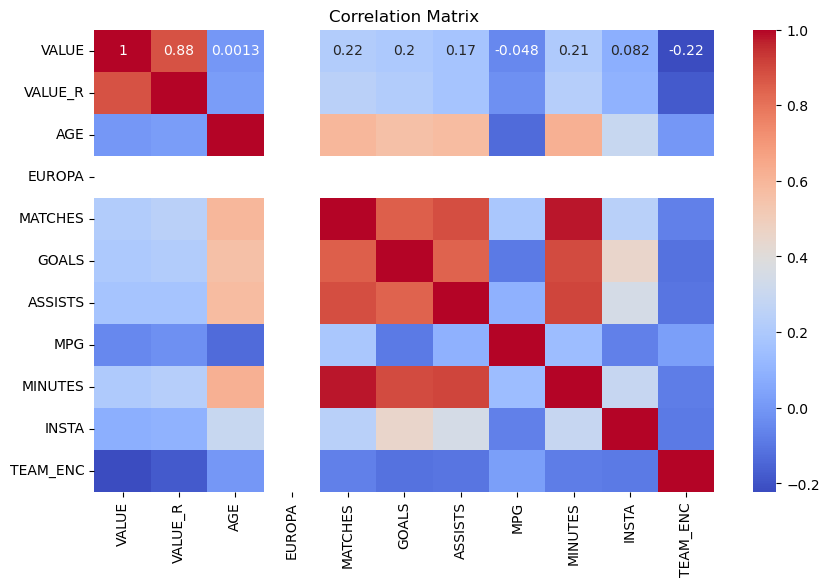

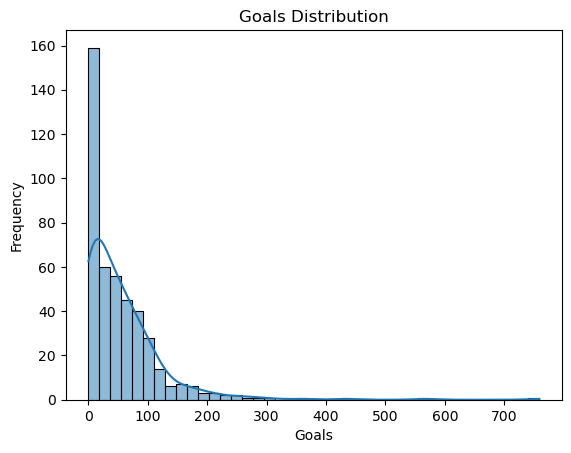

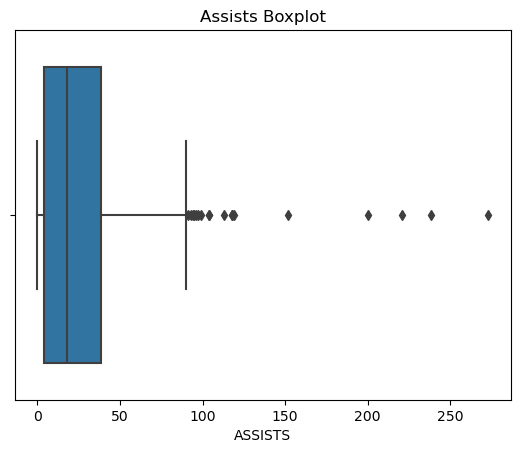

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Descriptive stats
display(df.describe())

# Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Goals distribution
sns.histplot(df['GOALS'], kde=True)
plt.title("Goals Distribution")
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.show()

# Boxplot for assists
sns.boxplot(x=df['ASSISTS'])
plt.title("Assists Boxplot")
plt.show()



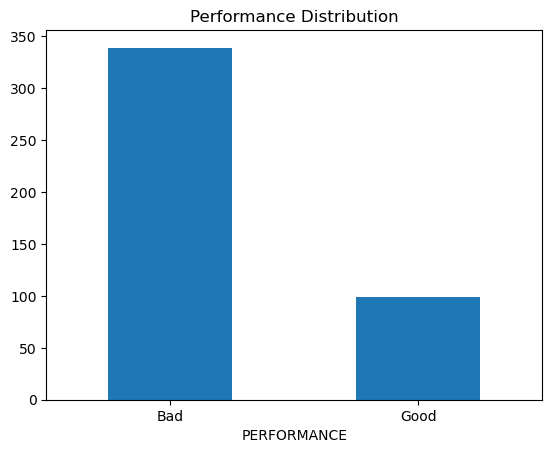

In [12]:
# Define performance (GOOD = 1 if GOALS + ASSISTS > 10, else BAD = 0)
df['PERFORMANCE'] = df['GOALS'] + df['ASSISTS']
df['PERFORMANCE'] = df['PERFORMANCE'].apply(lambda x: 1 if x >= 10 else 0)

# Check balance of classes
df['PERFORMANCE'].value_counts().plot(kind='bar')
plt.title("Performance Distribution")
plt.xticks(ticks=[0,1], labels=['Bad','Good'], rotation=0)
plt.show()


In [16]:
# Select features and target
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier


features = ['VALUE', 'AGE', 'EUROPA', 'MATCHES', 'GOALS', 'ASSISTS', 'MPG', 'MINUTES', 'TEAM_ENC']
X = df[features]
y = df['PERFORMANCE']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        67

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



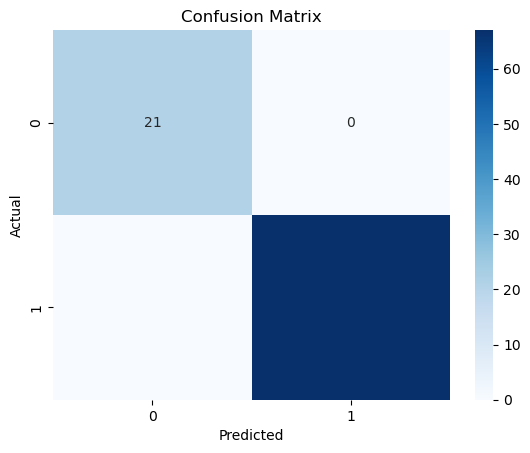

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
# Predictions and metrics
y_pred = model.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [19]:
def compute_rating(goals, assists, mpg):
    return round((goals * 4 + assists * 3 + mpg * 0.1), 2)

# Apply rating to all players
df['RATING'] = df.apply(lambda x: compute_rating(x['GOALS'], x['ASSISTS'], x['MPG']), axis=1)


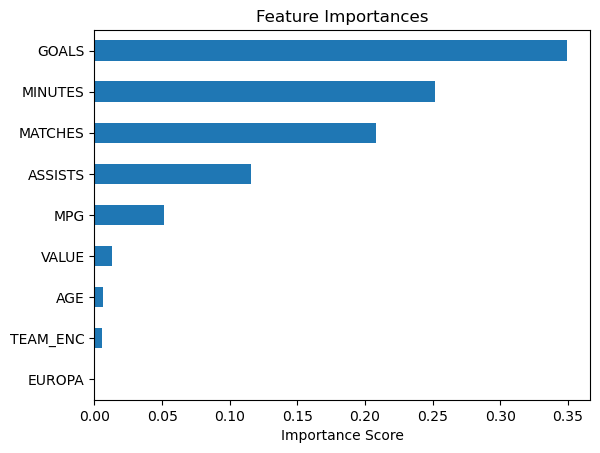

In [20]:
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.xlabel('Importance Score')
plt.show()
